# HW1

## a)

In [1]:
import numpy as np

In [2]:
def Jacobian(k, t):
    dtheta1 = np.exp(k[1] * t)
    dtheta2 = np.exp(k[1] * t) * t * k[0]
    J = np.vstack([dtheta1, dtheta2]).T
    return J

In [3]:
def calc_W(sigma2):
    sigma2 = np.array(sigma2)
    return np.diag(1/sigma2)

In [4]:
def model(k1, k2, t):
    x = np.exp(k2 * t) * k1
    return x

In [5]:
def theta_step(y, sigma2, theta, t):
    W = calc_W(sigma2)
    J = Jacobian(theta, t)
    x = model(theta[0], theta[1], t)
    delta_theta = (np.linalg.inv((J.T @ W @ J)) @ J.T @ W @ (x - y)).T
    return theta - delta_theta

In [6]:
def gauss_newton(y,
                sigma2,
                theta0,
                t,
                n_max=30, 
                eps=10**(-8)):
    
    history = []
    theta = theta0.ravel().copy()
    history.append(theta)
    
    for i in range(n_max):
        theta_new = theta_step(y, sigma2, theta, t)
        if np.linalg.norm(theta_new - theta, 1) < eps:
            theta = theta_new
            history.append(theta)
            break
        else:
            theta = theta_new
            history.append(theta)
    return theta, history

In [7]:
t = np.array([1, 2.5, 5, 7.5, 10])
y = np.array([2.78, 6.57, 10.57, 14.9, 27.1])
sigma2 = np.array([2.27, 2.26, 1.14, 1.70, 6.5])

In [8]:
theta0 = np.loadtxt('Input.txt', ndmin=2).ravel()

In [9]:
theta, _ = gauss_newton(y, 
             sigma2,
             theta0,
             t)

In [10]:
np.savetxt('Exc8Task1a.txt', theta, delimiter=',', fmt='%1.2f')

## b)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def g(y, sigma2, k1, k2, t):
    g_val = np.zeros(k1_mesh.shape)
    for i in range(g_val.shape[0]):
        for j in range(g_val.shape[1]):
            x = model(k1[i][j], k2[i][j], t)
            g_val[i][j] = (((y - x) ** 2) / sigma2).sum()
    return g_val

In [13]:
t = np.array([1, 2.5, 5, 7.5, 10])
y = np.array([2.78, 6.57, 10.57, 14.9, 27.1])
sigma2 = np.array([2.27, 2.26, 1.14, 1.70, 6.5])
theta0 = np.loadtxt('Input.txt', ndmin=2).ravel()

theta, history = gauss_newton(y, 
             sigma2,
             theta0,
             t)

history = np.array(history)

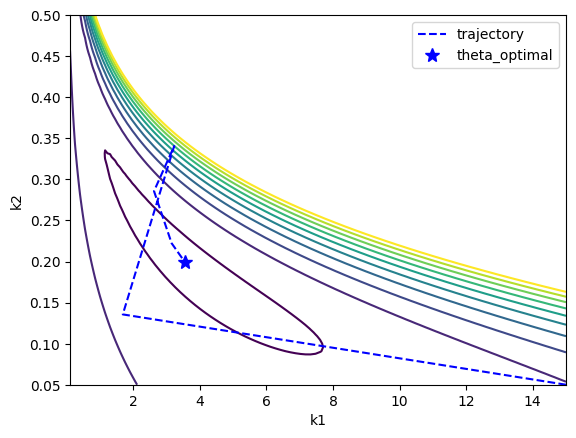

In [14]:
k1 = np.linspace(0.1, 15, 100)
k2 = np.linspace(0.05, 0.5, 100)

k1_mesh, k2_mesh = np.meshgrid(k1, k2)
g_val = g(y, sigma2, k1_mesh, k2_mesh, t)

levels = np.arange(30, 2000, 200) 

plt.contour(k1_mesh, k2_mesh, g_val, levels)
plt.plot(history[:, 0], 
         history[:, 1], 
         '--', 
         label='trajectory',
         color='blue')

plt.plot(theta[0], 
         theta[1], 
         '*', 
         label='theta_optimal',
         markersize=10,
         color='blue')

plt.xlabel('k1')
plt.ylabel('k2')
plt.legend()

plt.show()

Algorithm converges to the optimal value. The trajectory for $\theta$ does not look smooth in the beginning, in contrast, near the solution it is smooth. Also the step lenght is not constant, it is larger in the beginning and smaller at the end of the run, near the optimal solution.

## c)

In [20]:
t_pred = np.linspace(0, 12, 100)
x_pred = model(theta[0], theta[1], t_pred)

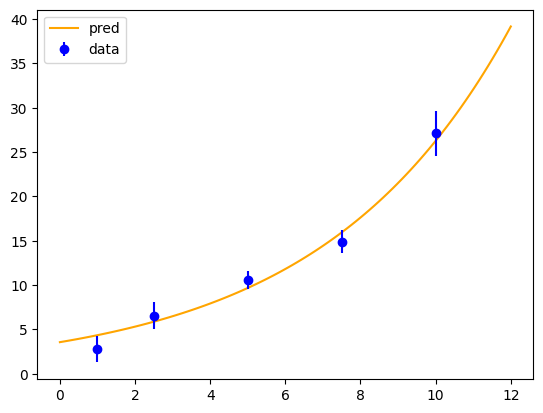

In [21]:
plt.plot(t_pred,
         x_pred,
         label='pred',
         color='orange')

plt.errorbar(t, 
            y,
            yerr=sigma2 ** 0.5,
            fmt='o',
            label='data',
            color='blue')

plt.legend()

## d)

In [22]:
sigma2 = np.array([7, 7, 7, 7, 7])
theta0 = np.loadtxt('Input.txt', ndmin=2).ravel()

theta, history = gauss_newton(y, 
             sigma2,
             theta0,
             t)

history = np.array(history)

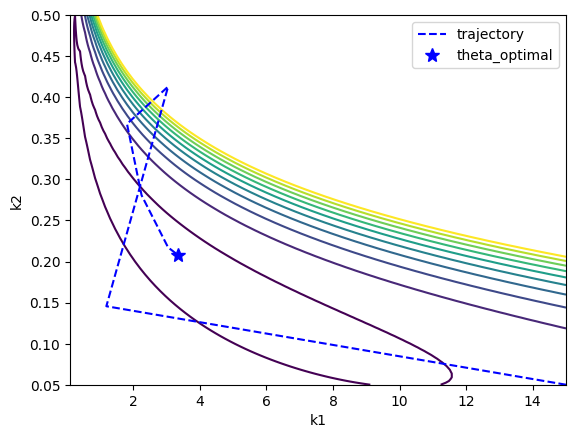

In [23]:
k1 = np.linspace(0.1, 15, 100)
k2 = np.linspace(0.05, 0.5, 100)

k1_mesh, k2_mesh = np.meshgrid(k1, k2)
g_val = g(y, sigma2, k1_mesh, k2_mesh, t)

levels = np.arange(30, 2000, 200) 

plt.contour(k1_mesh, k2_mesh, g_val, levels)
plt.plot(history[:, 0], 
         history[:, 1], 
         '--', 
         label='trajectory',
         color='blue')

plt.plot(theta[0], 
         theta[1], 
         '*', 
         label='theta_optimal',
         markersize=10,
         color='blue')

plt.xlabel('k1')
plt.ylabel('k2')
plt.legend()

plt.show()

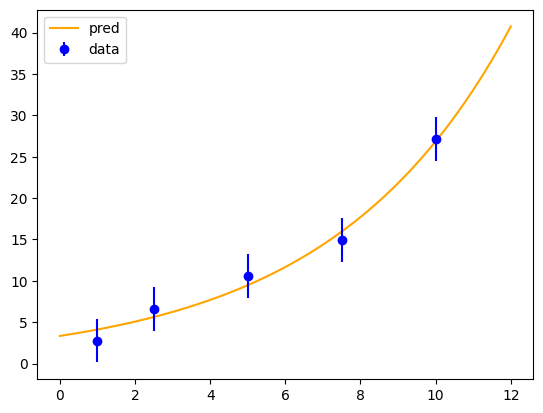

In [25]:
t_pred = np.linspace(0, 12, 100)
x_pred = model(theta[0], theta[1], t_pred)

plt.plot(t_pred,
         x_pred,
         label='pred',
         color='orange')

plt.errorbar(t, 
            y,
            yerr=sigma2 ** 0.5,
            fmt='o',
            label='data',
            color='blue')

plt.legend()

After changing $\sigma^2$, the optimal solution did not change dramatically, but plots became a bit different.

According to a contour plot, it seems that the levels are bit wider, additionally, some steps of the algorithm are bigger after changing $\sigma^2$, $\theta_s$ went out of the courtor lines on the second iteration.

According to the prediction-data plots, the error bars have different lenghts and have smaller values in comparison to the second plot (after changing $\sigma^2$). In addition, the predicted solution crosses all the error bars in the second plot (after changing $\sigma^2$) in contrast to the results on the first plot.

# HW2

## a)

In [26]:
from collections import defaultdict
import numpy as np

def compute_G(r10, r20, r31, r32, r03, n=4):
    G = np.zeros((n, n))
    G[1, 0] = r10
    G[2, 0] = r20
    G[3, 1] = r31
    G[3, 2] = r32
    G[0, 3] = r03

    for i in range(n):
        G[i, i] = -G[i].sum()
    return G


def compute_freq(data, n=4):
    freq = np.zeros(n)
    for item in data:
        freq[int(item)] += 1
    freq /= len(data)
    return freq

def compute_KL(freq, e_vector):
    KL = 0
    for k in range(len(freq)):
        KL += freq[k] * np.log(freq[k]/e_vector[k])
    return KL

In [27]:
theta0 = np.array([3, 1, 1, 7])
r03 = 5

data = np.loadtxt('data.txt')

In [28]:
freq = compute_freq(data)
G = compute_G(theta0[0],
  theta0[1],
  theta0[2],
  theta0[3],
  r03)

e_values, e_vectors = np.linalg.eig(G.T)
idx = abs(np.round(e_values*1e10)/1e10).argmin().item()
e_vector = (e_vectors[:, idx]/(e_vectors[:, idx]).sum()).real

In [29]:
KL = compute_KL(freq, e_vector)

In [30]:
np.savetxt('pi.txt', e_vector, delimiter=',', fmt='%1.2f')
np.savetxt('KL.txt', [KL], fmt='%1.2f')

## b)

In [31]:
import scipy

In [32]:
def wrapper_KL(freq, theta, r03):
    
    G = compute_G(theta[0],
        theta[1],
        theta[2],
        theta[3],
        r03)
    
    e_values, e_vectors = np.linalg.eig(G.T)
    idx = abs(np.round(e_values*1e10)/1e10).argmin().item()
    e_vector = (e_vectors[:, idx]/(e_vectors[:, idx]).sum()).real
    return compute_KL(freq, e_vector)

In [34]:
bounds = [(None, None),
          (None, None),
          (None, None),
          (6.5, 7.5)]

In [35]:
result = scipy.optimize.minimize(lambda theta: wrapper_KL(freq, theta, r03), theta0, bounds=bounds)

In [36]:
theta_star = result.x
G_star = compute_G(theta_star[0],
  theta_star[1],
  theta_star[2],
  theta_star[3],
  r03)

e_values_star, e_vectors_star = np.linalg.eig(G_star.T)
idx_star = abs(np.round(e_values_star*1e10)/1e10).argmin().item()
e_vector_star = (e_vectors_star[:, idx_star]/(e_vectors_star[:, idx_star]).sum()).real

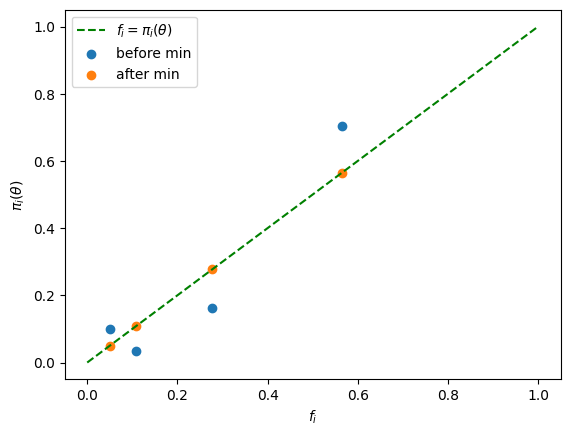

In [37]:
plt.plot([0, 1], [0, 1], '--', color='green', label=r'$f_i=\pi_i(\theta)$')

plt.scatter(freq, e_vector, label='before min')
plt.scatter(freq, e_vector_star, label='after min')
plt.xlabel(r'$f_i$')
plt.ylabel(r'$\pi_i(\theta)$')

plt.legend()

As we see, the orange points associated with the stationary distribution after minimization align the line $f_i=\pi_i(\theta)$, therefore the minimization works.

## Discussion

## Discuss if you think that the parameters of the model can be fitted well using your program

### Experiment 1: data perturbations

Technically, the stationary distribution based on the parameters from our model aligns with the statistics from frequencies obtained from the data. Hovewer, there is a question on if the number of entries is enough for states 1 and 3 in the data, and what are the deviations for these states and how would it affect parameter estimation?

In [39]:
counts = np.zeros(4)
for item in data:
    counts[int(item)] += 1

In [40]:
for i, item in enumerate(counts):
    print(f'State {i} - {int(item)} entries')

State 0 - 28 entries
State 1 - 11 entries
State 2 - 57 entries
State 3 - 5 entries


In [41]:
from tqdm import tqdm
import random

def add_noise_to_freq(freq, n_samples=100):
    counts = np.random.multinomial(n_samples, freq)    
    noisy_freq = counts / n_samples
    return noisy_freq, counts

n_iter = 1000
thetas = []
freq_noisy_hist = []
counts_noisy_hist = []

r03 = 5
theta0 = np.array([3, 1, 1, 7])
bounds = [(None, None),
          (None, None),
          (None, None),
          (6.5, 7.5)]

random.seed(3)

for i in tqdm(range(n_iter)):
    freq_noisy, counts_noisy = add_noise_to_freq(freq, n_samples=100)
    freq_noisy_hist.append(freq_noisy)
    counts_noisy_hist.append(counts_noisy)
    
    try:
        result = scipy.optimize.minimize(lambda theta: wrapper_KL(freq_noisy, theta, r03), theta0, bounds=bounds)
        if result.success:
            thetas.append(result.x)
    except:

        pass
    

thetas = np.array(thetas)
freq_noisy_hist = np.array(freq_noisy_hist)
counts_noisy_hist = np.array(counts_noisy_hist)

  0%|                                                                                        | 0/1000 [00:00<?, ?it/s]/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_16821/1275534598.py:27: RuntimeWarning: invalid value encountered in log
  KL += freq[k] * np.log(freq[k]/e_vector[k])
  3%|██▎                                                                           | 29/1000 [00:00<00:06, 142.47it/s]/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_16821/1275534598.py:27: RuntimeWarning: divide by zero encountered in log
  KL += freq[k] * np.log(freq[k]/e_vector[k])
/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_16821/1275534598.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  KL += freq[k] * np.log(freq[k]/e_vector[k])
100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 158.17it/s]


In [42]:
print(f'Successful fits: {len(thetas)}/{n_iter}')
print("Parameter uncertainty:")
print(f'r10: {thetas[:,0].mean()} +- {thetas[:,0].std()}')
print(f'r20: {thetas[:,1].mean()} +- {thetas[:,1].std()}')
print(f'r31: {thetas[:,2].mean()} +- {thetas[:,2].std()}')
print(f'r32: {thetas[:,3].mean()} +- {thetas[:,3].std()}')

Successful fits: 992/1000
Parameter uncertainty:
r10: 10.386691338373085 +- 5.382736439312716
r20: 0.6748025405328351 +- 0.3166684448334635
r31: 28.149148833257296 +- 24.44602479751521
r32: 7.411062613632882 +- 0.22923834685942732


In [43]:
print("Noisy counts:")
print(f'cnt_0: {counts_noisy_hist[:,0].mean()} +- {counts_noisy_hist[:,0].std()}')
print(f'cnt_1: {counts_noisy_hist[:,1].mean()} +- {counts_noisy_hist[:,1].std()}')
print(f'cnt_2: {counts_noisy_hist[:,2].mean()} +- {counts_noisy_hist[:,2].std()}')
print(f'cnt_3: {counts_noisy_hist[:,3].mean()} +- {counts_noisy_hist[:,3].std()}')

Noisy counts:
cnt_0: 27.678 +- 4.388657653542824
cnt_1: 10.928 +- 3.207618431172885
cnt_2: 56.401 +- 4.915505975990671
cnt_3: 4.993 +- 2.2282170002044235


In [44]:
print("Noisy frequencies:")
print(f'f0: {freq_noisy_hist[:,0].mean()} +- {freq_noisy_hist[:,0].std()}')
print(f'f1: {freq_noisy_hist[:,1].mean()} +- {freq_noisy_hist[:,1].std()}')
print(f'f2: {freq_noisy_hist[:,2].mean()} +- {freq_noisy_hist[:,2].std()}')
print(f'f3: {freq_noisy_hist[:,3].mean()} +- {freq_noisy_hist[:,3].std()}')

Noisy frequencies:
f0: 0.27678 +- 0.04388657653542823
f1: 0.10928000000000002 +- 0.03207618431172885
f2: 0.56401 +- 0.04915505975990671
f3: 0.04993000000000001 +- 0.022282170002044237


In [45]:
e_vector_hist = []
for t in thetas:  
    G_test = compute_G(t[0],
      t[1],
      t[2],
      t[3],
      r03)
    
    e_values_test, e_vectors_test = np.linalg.eig(G_test.T)
    idx_test = abs(np.round(e_values_test*1e10)/1e10).argmin().item()
    e_vector_test = (e_vectors_test[:, idx_test]/(e_vectors_test[:, idx_test]).sum()).real
    e_vector_hist.append(e_vector_test)

e_vector_hist = np.array(e_vector_hist)
print(f'pi_0: {e_vector_hist[:,0].mean()} +- {e_vector_hist[:,0].std()}')
print(f'pi_1: {e_vector_hist[:,1].mean()} +- {e_vector_hist[:,1].std()}')
print(f'pi_2: {e_vector_hist[:,2].mean()} +- {e_vector_hist[:,2].std()}')
print(f'pi_3: {e_vector_hist[:,3].mean()} +- {e_vector_hist[:,3].std()}')

pi_0: 0.2766772953813091 +- 0.04397399387942243
pi_1: 0.10918988252932388 +- 0.03208356748089654
pi_2: 0.5637903347214943 +- 0.049190354244592255
pi_3: 0.050342487367872765 +- 0.021898050449999484


[]

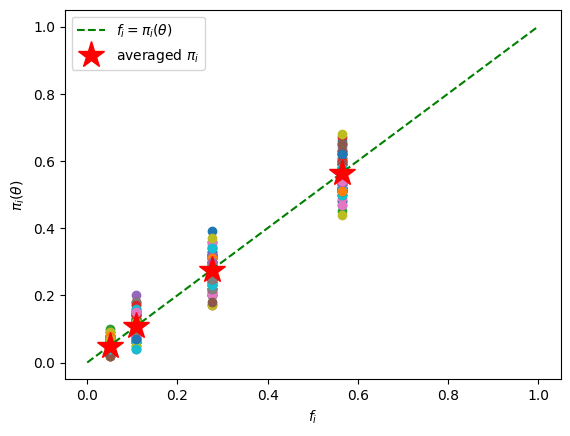

In [46]:
plt.plot([0, 1], [0, 1], '--', color='green', label=r'$f_i=\pi_i(\theta)$')

for v in e_vector_hist[:100]:
    
    
    plt.scatter(freq, v)
    plt.xlabel(r'$f_i$')
    plt.ylabel(r'$\pi_i(\theta)$')
    
    

plt.plot(freq, e_vector_hist.mean(0), '*', color='red', markersize=20, label=r'averaged $\pi_i$')
plt.legend()
plt.plot()

In [47]:
KL_hist = []
for f in freq_noisy_hist:
    KL_hist.append(wrapper_KL(f, theta_star, r03))

/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_16821/1275534598.py:27: RuntimeWarning: divide by zero encountered in log
  KL += freq[k] * np.log(freq[k]/e_vector[k])
/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_16821/1275534598.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  KL += freq[k] * np.log(freq[k]/e_vector[k])


(array([  1.,   6.,   6.,  35.,  75., 180., 271., 306., 107.,   5.]),
 array([-8.93952217, -8.26201665, -7.58451112, -6.9070056 , -6.22950008,
        -5.55199456, -4.87448904, -4.19698351, -3.51947799, -2.84197247,
        -2.16446695]),
 <BarContainer object of 10 artists>)

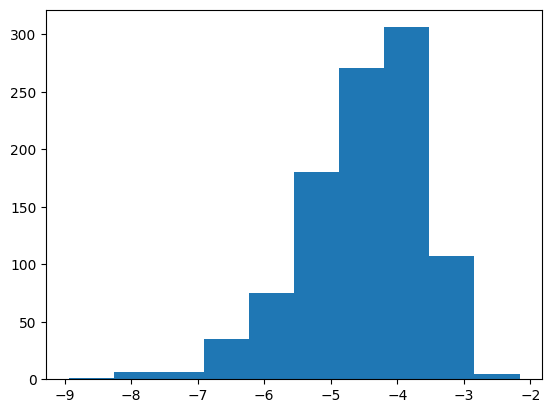

In [48]:
plt.hist(np.log(KL_hist))

### Experiment 2: parameter perturbations
Additionally, it is interesting to take a look at effects of the initial parameter perturbations on the result.

In [49]:
import random

def add_noise_to_theta0(theta0, noise_level=0.001):
    noise = np.random.normal(0, noise_level * theta0, size=len(theta0))
    theta_noisy = theta0 + noise
    
    theta_noisy = np.maximum(theta_noisy, noise_level)
    return theta_noisy

n_iter = 1000
thetas = []

r03 = 5

random.seed(3)
KL_hist = []

for i in range(n_iter):
    theta_noisy = add_noise_to_theta0(theta_star)
    KL_hist.append(wrapper_KL(freq, theta_noisy, r03))

(array([  1.,   3.,   8.,  35.,  88., 180., 270., 260., 132.,  23.]),
 array([-21.68356771, -20.7597391 , -19.83591049, -18.91208187,
        -17.98825326, -17.06442465, -16.14059604, -15.21676742,
        -14.29293881, -13.3691102 , -12.44528159]),
 <BarContainer object of 10 artists>)

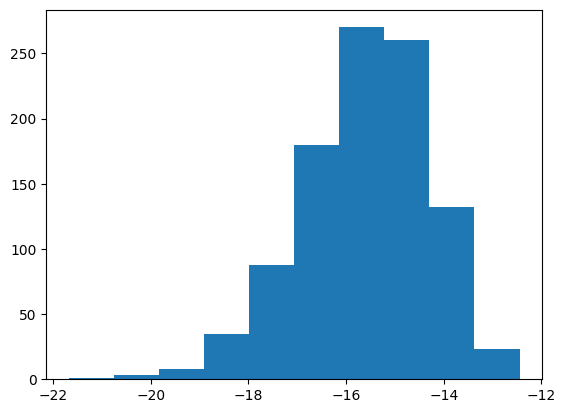

In [50]:
plt.hist(np.log(KL_hist))

## Discuss if convergence to an optimal parameter set is feasible from anywhere in parameter space

### Experiment 3: no bounds

In [51]:
def wrapper_KL_tracking(freq, theta, r03):
    traj.append(theta.copy())
    return wrapper_KL(freq, theta, r03)

r03 = 5
theta0_hat = np.array([0.003, 0.001, 0.001, 7])
traj = []

bounds = [(None, None),
          (None, None),
          (None, None),
          (6.5, 7.5)]

result = scipy.optimize.minimize(lambda theta: wrapper_KL_tracking(freq, theta, r03), theta0_hat, bounds=bounds)

/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_16821/1275534598.py:27: RuntimeWarning: invalid value encountered in log
  KL += freq[k] * np.log(freq[k]/e_vector[k])


In [52]:
result

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: nan
        x: [ 3.000e-03  1.000e-03  1.000e-03  7.000e+00]
      nit: 0
      jac: [ 3.629e+01 -4.353e+02 -1.089e+02  2.261e-02]
     nfev: 35
     njev: 7
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [53]:
KL_hist = []
for t in traj:
    KL_hist.append(wrapper_KL(freq, t, r03))

/var/folders/6d/q9k5j9917lzfbk22pyg8733h0000gn/T/ipykernel_16821/1275534598.py:27: RuntimeWarning: invalid value encountered in log
  KL += freq[k] * np.log(freq[k]/e_vector[k])


In [54]:
for i in range(len(traj)):
    print(f'theta: {traj[i]}, KL: {KL_hist[i]}')

theta: [3.e-03 1.e-03 1.e-03 7.e+00], KL: 2.814977612522357
theta: [3.00001e-03 1.00000e-03 1.00000e-03 7.00000e+00], KL: 2.8149779753993887
theta: [3.00000e-03 1.00001e-03 1.00000e-03 7.00000e+00], KL: 2.814973260012019
theta: [3.00000e-03 1.00000e-03 1.00001e-03 7.00000e+00], KL: 2.814976523499206
theta: [3.00000000e-03 1.00000000e-03 1.00000000e-03 7.00000001e+00], KL: 2.814977612748451
theta: [-0.07761546  0.96793812  0.24293349  6.99994977], KL: nan
theta: [-0.07761545  0.96793812  0.24293349  6.99994977], KL: nan
theta: [-0.07761546  0.96793813  0.24293349  6.99994977], KL: nan
theta: [-0.07761546  0.96793812  0.2429335   6.99994977], KL: nan
theta: [-0.07761546  0.96793812  0.24293349  6.99994978], KL: nan
theta: [-0.40007731  4.83569061  1.21066743  6.99974886], KL: nan
theta: [-0.4000773   4.83569061  1.21066743  6.99974886], KL: nan
theta: [-0.40007731  4.83569062  1.21066743  6.99974886], KL: nan
theta: [-0.40007731  4.83569061  1.21066744  6.99974886], KL: nan
theta: [-0.40

### Experiment 4: with bounds

In [55]:
r03 = 5
theta0_hat = np.array([0.003, 0.001, 0.001, 7])
traj = []

bounds = [(1e-10, 100),
          (1e-10, 100),
          (1e-10, 100),
          (6.5, 7.5)]

result = scipy.optimize.minimize(lambda theta: wrapper_KL_tracking(freq, theta, r03), theta0_hat, bounds=bounds)

In [56]:
result

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 1.0451156897528395e-10
        x: [ 9.318e+00  6.579e-01  2.050e+01  7.500e+00]
      nit: 33
      jac: [ 3.648e-07 -7.146e-06 -2.605e-07  5.204e-07]
     nfev: 220
     njev: 44
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

# HW3